In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
dataset = pd.read_csv('loan_data.csv').drop_duplicates()
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
dataset.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [4]:
dataset.shape

(9578, 14)

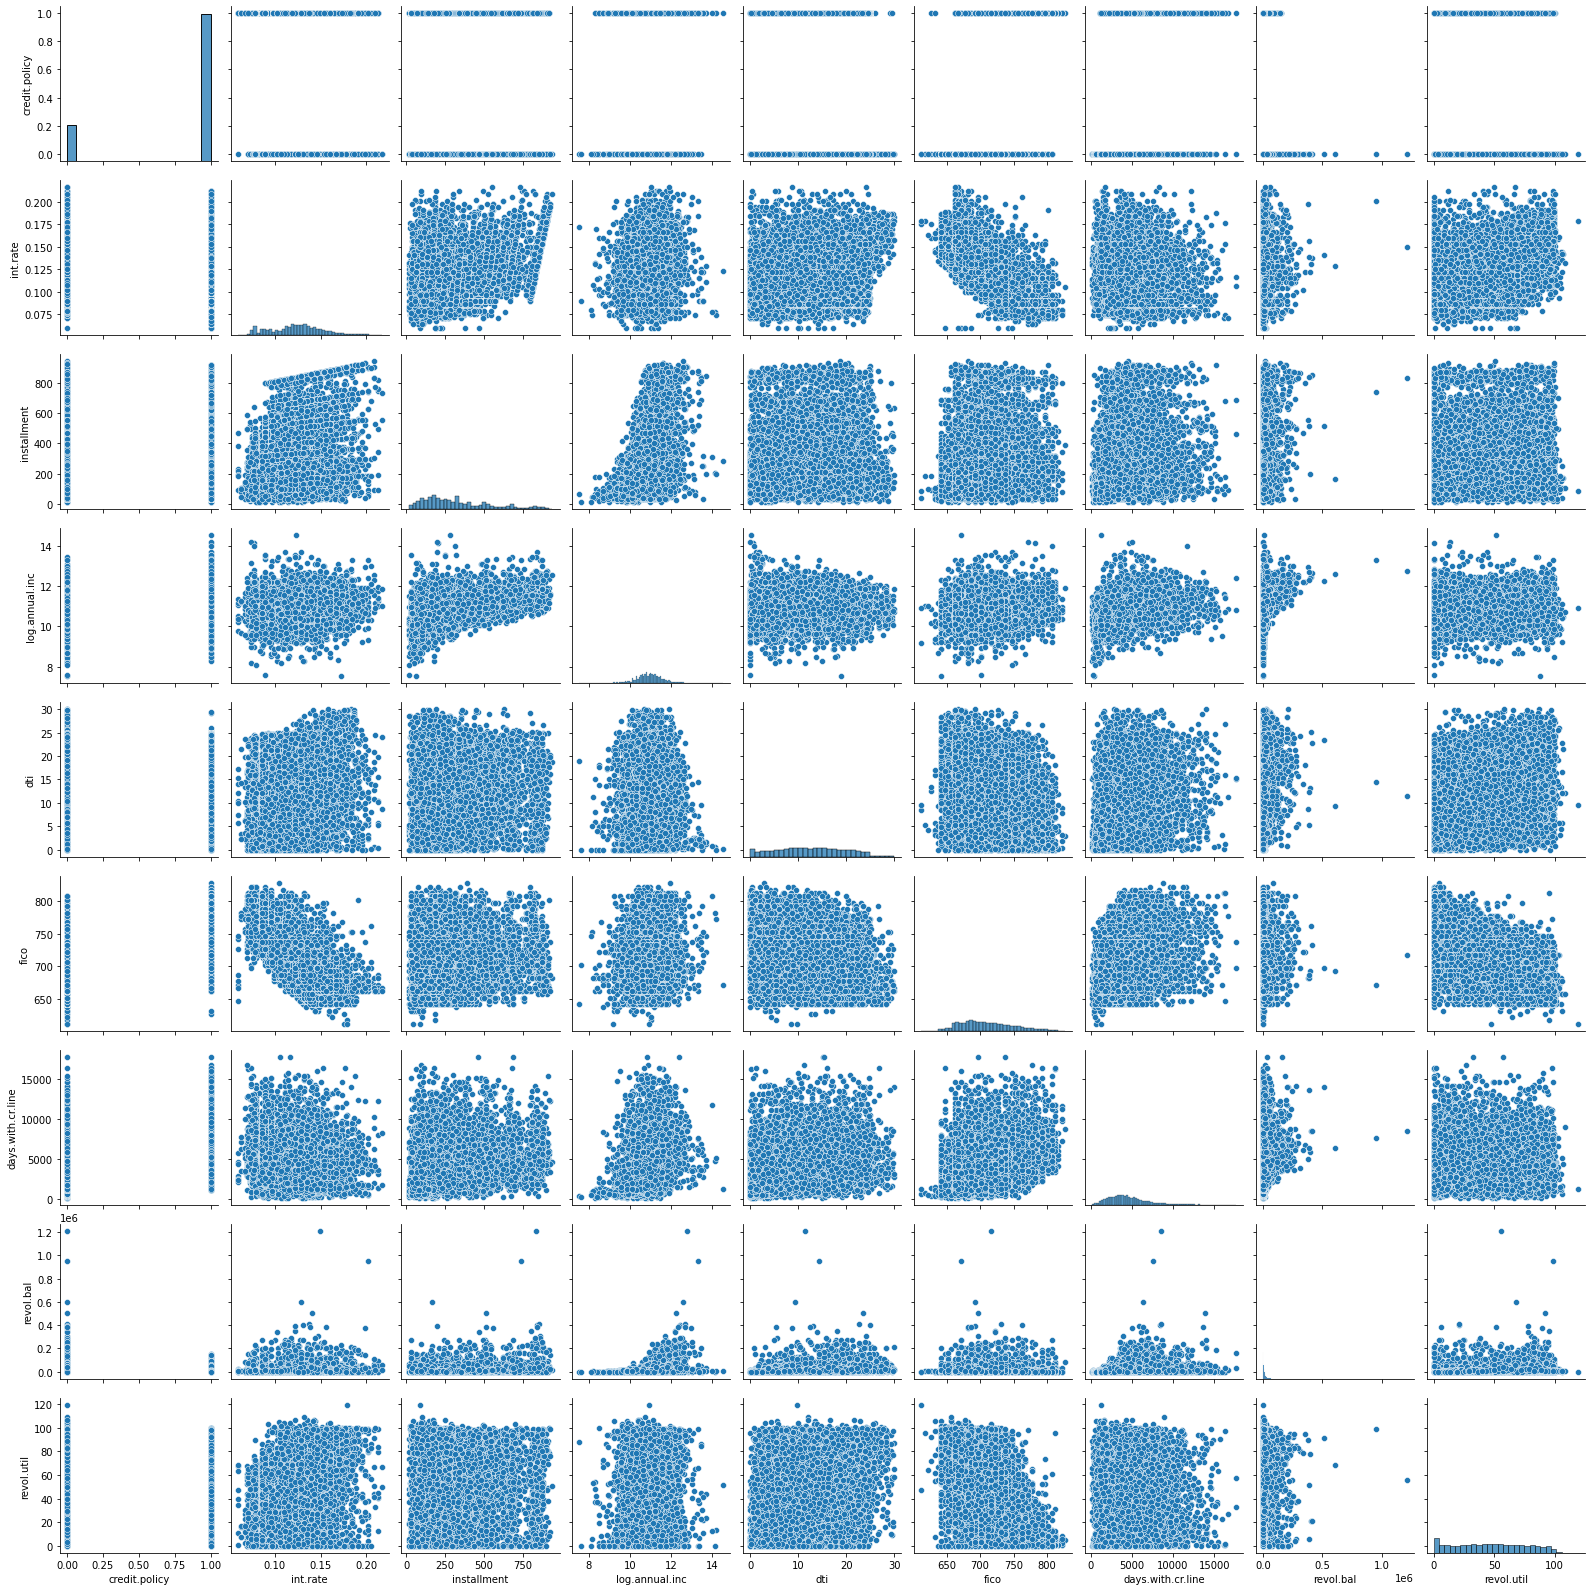

In [5]:
sns.pairplot(dataset.drop(columns=['purpose','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']))

c:\Users\97156\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


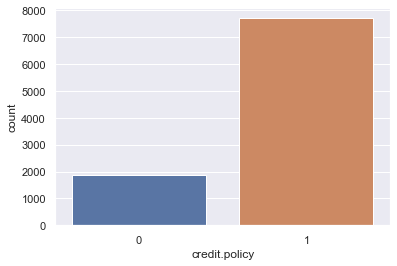

c:\Users\97156\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


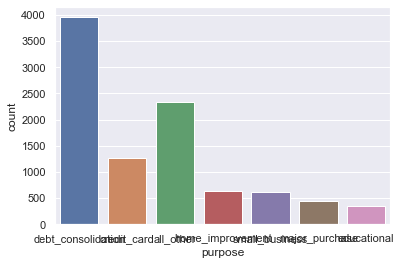

c:\Users\97156\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


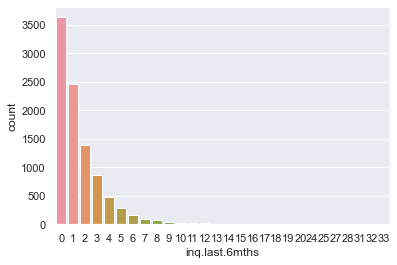

c:\Users\97156\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


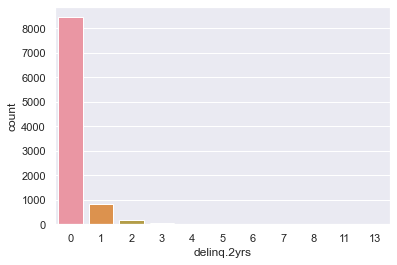

c:\Users\97156\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


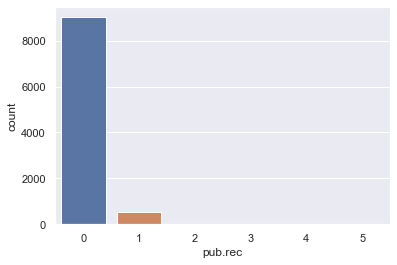

c:\Users\97156\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


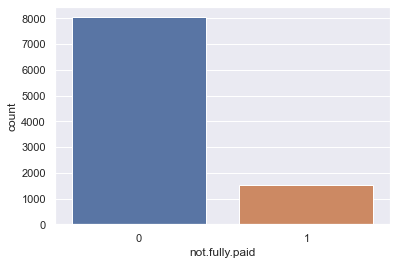

In [6]:
sns.set()
cat_var = dataset.drop(columns = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']).copy()
cat_cols = cat_var.columns.values.tolist()
for col in cat_cols:
    sns.countplot(cat_var[col])
    plt.show()

In [7]:
ohe =  OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', ohe, ['purpose'])], remainder='passthrough')
ct.fit_transform(dataset)
dataset = pd.get_dummies(dataset)
dataset.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [8]:
f = plt.figure(figsize=(20,20))
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


<Figure size 1440x1440 with 0 Axes>

We can see that the intrest rate and revol.util are highly coorelated with fico score. and that the fico score has more predictive power than the both. therefore, we will be dropping these two features

In [9]:
dataset = dataset.drop(columns=['int.rate','revol.util'])

In [10]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
stdscl = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
X_train[:,0:9] = stdscl.fit_transform(X_train[:,0:9])
X_test[:,0:9] = stdscl.fit_transform(X_test[:,0:9])

In [11]:
def build_classifier(optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 5, activation = 'relu', input_shape = (17,)))
    model.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer=optimizer,loss = 'binary_crossentropy',metrics = ['accuracy'])
    return model

In [12]:
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_classifier)
param_grid = {'epochs':[100,5000],'optimizer':[tf.keras.optimizers.Adam(),tf.keras.optimizers.RMSprop(),tf.keras.optimizers.Adagrad()]}
model = GridSearchCV(estimator=classifier,param_grid=param_grid,scoring='accuracy')

C:\Users\97156\AppData\Local\Temp\ipykernel_1844\2212760722.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_classifier)


In [13]:
X_train

array([[ 0.78416021,  0.95396034, -1.13324201, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.31339588, -0.24590795, -0.0069299 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92031809,  0.11887967,  0.67264084, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.39985687, -0.17043457, -0.36053951, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.50263404,  0.24973082, -0.50023714, ...,  0.        ,
         0.        ,  1.        ],
       [-1.08300958, -1.31230739,  0.22735466, ...,  0.        ,
         0.        ,  0.        ]])

In [14]:
history =  model.fit(X_train, y_train,epochs = 10,validation_data=(X_test, y_test))

Epoch 1/10
180/180 [==============================] - 1s 3ms/step - loss: 0.5818 - accuracy: 0.7885 - val_loss: 0.4739 - val_accuracy: 0.8125
Epoch 2/10
180/180 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7976 - val_loss: 0.3679 - val_accuracy: 0.8125
Epoch 3/10
180/180 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8249 - val_loss: 0.3025 - val_accuracy: 0.8768
Epoch 4/10
180/180 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8848 - val_loss: 0.2565 - val_accuracy: 0.9040
Epoch 5/10
180/180 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8937 - val_loss: 0.2435 - val_accuracy: 0.9031
Epoch 6/10
180/180 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8978 - val_loss: 0.2379 - val_accuracy: 0.9061
Epoch 7/10
180/180 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9011 - val_loss: 0.2299 - val_accuracy: 0.9148
Epoch 

In [ ]:
print(model.best_params_)

{'epochs': 1000, 'optimizer': <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000019685E6A350>}


In [ ]:
print(model.best_score_)

0.9039388776137225


In [ ]:
y_pred = (model.predict(X_test)>0.5).astype('int64')

75/75 [==============================] - 0s 958us/step


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 331  118]
 [  65 1881]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       449
           1       0.94      0.97      0.95      1946

    accuracy                           0.92      2395
   macro avg       0.89      0.85      0.87      2395
weighted avg       0.92      0.92      0.92      2395

